### **Data used - Movie Genre data with Title, Genre & Description**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd

In [3]:
train_data_path = '/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/Data/train_data.txt'
train_csv = '/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/Data/train.csv'
test_data_path = '/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/Data/test_data.txt'
test_csv = '/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/Data/test.csv'

### **Conversion to structured format - csv**

In [4]:
data_train = pd.read_csv(train_data_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
data_train.to_csv(train_csv, index=False)

In [5]:
data_test = pd.read_csv(test_data_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
data_test.to_csv(test_csv, index=False)   # Now train_csv and test_csv can be used further!

### **Load CSV files**

In [21]:
data = pd.read_csv(train_csv)

### **Some EDA on the data in CSV**

In [ ]:
data.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
data.tail()

,Title,Genre,Description
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [ ]:
data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
data['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

### **Bar graph on the Genre**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

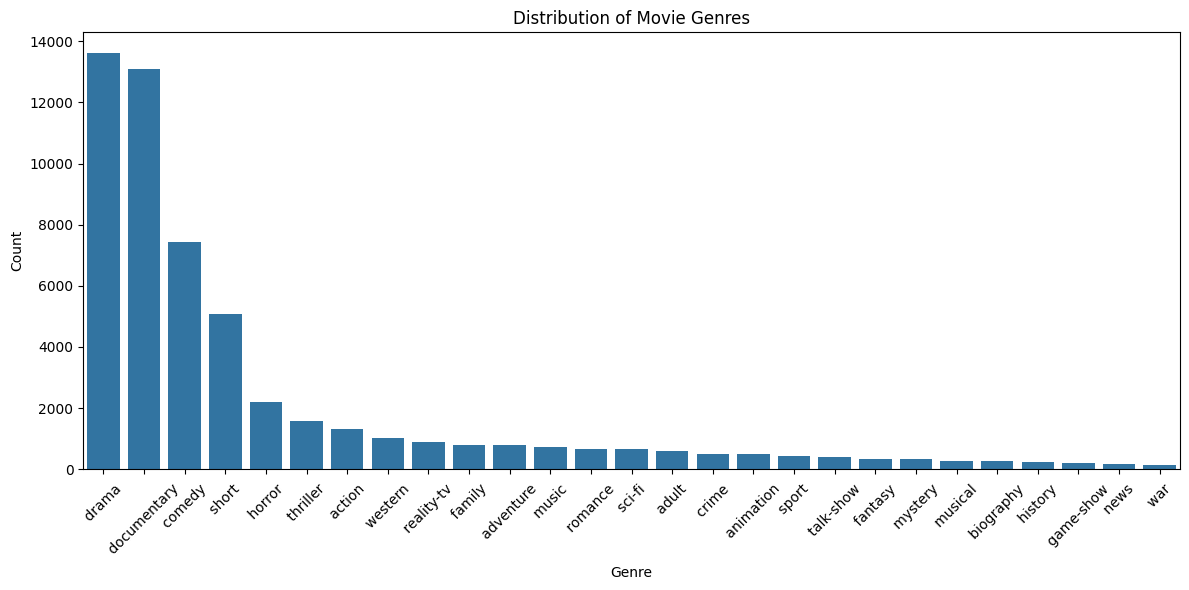

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Preprocessing the text - Description**

In [7]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stemmer = LancasterStemmer()
stopwords = set(stopwords.words('english'))

In [10]:
def preprocess_content(text):
  text = text.lower()
  text = re.sub(r'@\S+',' ',text) # remove words starting with @
  text = re.sub(r'http\S+',' ',text) # remove words starting with http
  text = re.sub(r'.pic\S+',' ',text) # remove words starting with .pic
  text = re.sub(r'[^a-zA-Z+]',' ',text) #remove non alphabets
  text = "".join([i for i in text if i not in string.punctuation])

  words = nltk.word_tokenize(text) # only by tokenization we can remove stopwords
  text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
  text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
  return text

In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
data["Cleaned"] = data["Description"].apply(preprocess_content)

In [ ]:
data.head()

,Title,Genre,Description,Cleaned
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


### **Vectorization**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer()

X_train = vectorize.fit_transform(data["Cleaned"])

### **Model Development**

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
X = X_train
y = data["Genre"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = SVC()
model.fit(X_train, Y_train)

SVC()

In [ ]:
model.score(X_train, Y_train)

0.9034608378870674

In [17]:
# loading library
import pickle

In [ ]:
# create an iterator object with write permission - model.pkl
with open('/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/model_pkl', 'wb') as files:
    pickle.dump(model, files)

### **Testing on test data**

In [6]:
test = pd.read_csv('/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/Data/test.csv')

In [12]:
test["Cleaned"] = test["Description"].apply(preprocess_content)

In [18]:
model = pickle.load(open('/content/drive/MyDrive/Foundational_Projects/Movie_Genre_Classification/model_pkl', 'rb'))

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5674628792769528
